In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import torch

In [131]:

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, concatenate, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [119]:
# embeddings : 512
llama_embeddings = "/content/gdrive/My Drive/Colab Notebooks/Learnings/XORM/llama_embeddings.pkl"
codet5_embeddings = "/content/gdrive/My Drive/Colab Notebooks/Learnings/XORM/codet5_embeddings.pkl"
graphcodebert_embeddings = "/content/gdrive/My Drive/Colab Notebooks/Learnings/XORM/graphcodebert_embeddings.pkl"


with open(llama_embeddings, 'rb') as f:
    llama_embeddings = pickle.load(f)

with open(codet5_embeddings, 'rb') as f:
    codet5_embeddings = pickle.load(f)

with open(graphcodebert_embeddings, 'rb') as f:
    graphcodebert_embeddings = pickle.load(f)

In [121]:
# llama_embeddings[0].detach().numpy()

In [122]:
# reshape list of torch tensor to numpy array
llama_np = np.array([t.detach().numpy() for t in llama_embeddings])
codet5_np = np.array([t.detach().numpy() for t in codet5_embeddings])
graphcodebert_np = np.array([t.detach().numpy() for t in graphcodebert_embeddings])

print(llama_np.shape)
print(codet5_np.shape)
print(graphcodebert_np.shape)

(5000, 1, 512)
(5000, 1, 512)
(5000, 1, 512)


In [123]:
encoder_embeddings = np.concatenate((llama_np, codet5_np, graphcodebert_np), axis=2)
print(encoder_embeddings.shape)

(5000, 1, 1536)


In [124]:
# Leant Features
leant_feature_1 = np.random.rand(5000)
leant_feature_2 = np.random.rand(5000)
leant_feature_3 = np.random.rand(5000)
leant_feature_4 = np.random.rand(5000)
leant_feature_5 = np.random.rand(5000)
leant_feature_6 = np.random.rand(5000)
leant_feature_7 = np.random.rand(5000)
leant_feature_8 = np.random.rand(5000)
leant_feature_9 = np.random.rand(5000)
leant_feature_10 = np.random.rand(5000)

In [125]:

leant_feature = np.dstack((leant_feature_1, leant_feature_2, leant_feature_3, leant_feature_4, leant_feature_5,
                           leant_feature_6, leant_feature_7, leant_feature_8, leant_feature_9, leant_feature_10))
leant_feature = leant_feature.squeeze()
print(leant_feature.shape)

(5000, 10)


In [126]:
normalized_insert_output_1= np.random.beta(a=2, b=3, size=5000)
normalized_query_output_2 = np.random.beta(a=2, b=5, size=5000)
normalized_memory_output_3 = np.random.beta(a=1, b=4, size=5000)

In [127]:
model_output = np.dstack((normalized_insert_output_1, normalized_query_output_2, normalized_memory_output_3))
model_output = model_output.squeeze()
print(model_output.shape)

(5000, 3)


In [128]:

# Split the data into training and validation sets
encoder_train, encoder_val, leant_train, leant_val, output_train, output_val = train_test_split(
    encoder_embeddings, leant_feature, model_output, test_size=0.2, random_state=42)

print("Encoder embeddings train shape:", encoder_train.shape)
print("Encoder embeddings validation shape:", encoder_val.shape)
print("Leant feature train shape:", leant_train.shape)
print("Leant feature validation shape:", leant_val.shape)
print("Output train shape:", output_train.shape)
print("Output validation shape:", output_val.shape)

Encoder embeddings train shape: (4000, 1, 1536)
Encoder embeddings validation shape: (1000, 1, 1536)
Leant feature train shape: (4000, 10)
Leant feature validation shape: (1000, 10)
Output train shape: (4000, 3)
Output validation shape: (1000, 3)


In [129]:
# X_embed_train, X_embed_test, y_train, y_test = train_test_split(encoder_embeddings, model_output, test_size=0.2, random_state=42)
# X_leant_train, X_leant_test, _, _ = train_test_split(leant_feature, model_output, test_size=0.2, random_state=42)

In [130]:
# prompt: sample same rows for X_leant_train as X_embed_train
# X_leant_train, X_leant_test, _, _ = train_test_split(leant_feature, model_output, test_size=0.2, random_state=42, train_size=len(X_embed_train))

In [132]:
# Model Architecture
embedding_input_shape = encoder_embeddings.shape[1:]
embedding_input = Input(shape=embedding_input_shape, name='embedding_input')
flatten_embedding = keras.layers.Flatten()(embedding_input)
embedding_branch = Dense(128, activation='relu', name='embedding_dense')(flatten_embedding)


leant_feature_input_shape = leant_feature.shape[1:] # (number_of_features,)
leant_feature_input = Input(shape=leant_feature_input_shape, name='leant_feature_input')
leant_feature_branch = Dense(64, activation='relu', name='leant_feature_dense')(leant_feature_input)


# Combine the branches
combined = concatenate([embedding_branch, leant_feature_branch])

# Add batch normalization after concatenation
batch_norm = BatchNormalization()(combined)

# Add some dense layers for prediction
dense1 = Dense(64, activation='relu')(combined)
dropout1 = Dropout(0.3)(dense1)
dense2 = Dense(32, activation='relu')(dropout1)
dropout2 = Dropout(0.3)(dense2)

# Output layer - assuming 3 output values
output_layer = Dense(3, activation='linear', name='output')(dropout2) # Using linear activation for regression

# Create the model
model = Model(inputs=[embedding_input, leant_feature_input], outputs=output_layer)


In [133]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae']) # Using Mean Squared Error and Mean Absolute Error for regression

# Print the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ embedding_input     │ (None, 1, 1536)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1536)      │          0 │ embedding_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leant_feature_input │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_dense     │ (None, 128)       │    196,736 │ flatten_1[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leant_feature_dense │ (None, 64)        │        704 │ leant_feature_in… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 192)       │          0 │ embedding_dense[… │
│ (Concatenate)       │                   │            │ leant_feature_de… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │     12,352 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      2,080 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 3)         │         99 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 211,971 (828.01 KB)

 Trainable params: 211,971 (828.01 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:

# Train the model
history = model.fit(
    [encoder_train, leant_train],
    output_train,
    epochs=50, # Adjust the number of epochs as needed
    batch_size=32, # Adjust the batch size as needed
    validation_split=0.2 # Use a portion of the training data for validation
)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0804 - mae: 0.2182 - val_loss: 0.0344 - val_mae: 0.1452
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0377 - mae: 0.1523 - val_loss: 0.0340 - val_mae: 0.1458
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0305 - mae: 0.1384 - val_loss: 0.0336 - val_mae: 0.1470
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0264 - mae: 0.1296 - val_loss: 0.0342 - val_mae: 0.1469
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0228 - mae: 0.1198 - val_loss: 0.0346 - val_mae: 0.1470
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0211 - mae: 0.1141 - val_loss: 0.0345 - val_mae: 0.1473
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0184 - mae: 0.1073 - val_loss: 0.0357 - val_mae: 0.1490
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0169 - mae: 0.1011 - val_loss: 0.0363 - val_mae: 0.1497
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - l

Test Loss: 0.0394
Test MAE: 0.1569


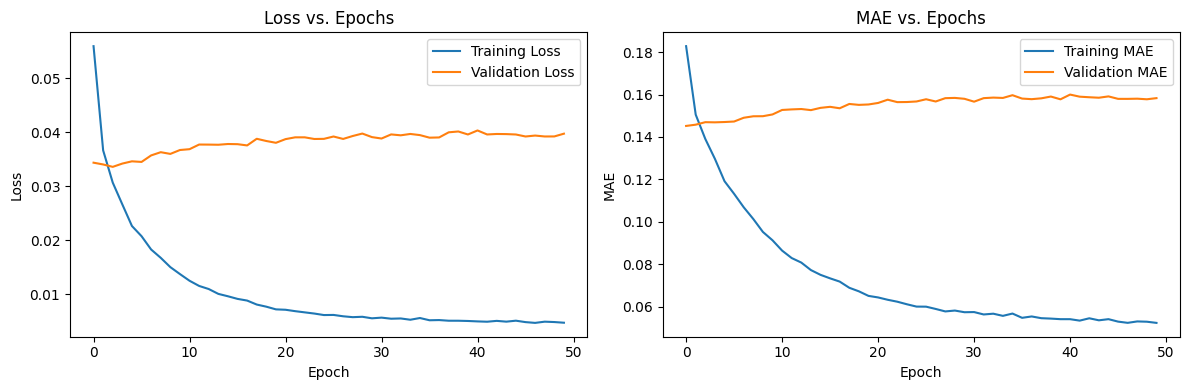

In [135]:

# Evaluate the model on the test data
loss, mae = model.evaluate([encoder_val, leant_val], output_val, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()